In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import GridSearchCV, KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# Utilitarias
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, Markdown

import pickle

In [ ]:
# Importa base de datos
df_fleet = pd.read_csv('shipperscommunity.csv').iloc[:, 0:] #Datos de entrenamiento


display(Markdown("**Base de datos conjunto de entrenamiento**: Tiene {} columnas y {} filas ".format(df_fleet.shape[1], df_fleet.shape[0])))
display(Markdown("**Algunas observaciones de la base de datos original**"))
df_fleet

**Base de datos conjunto de entrenamiento**: Tiene 19 columnas y 1985 filas 

**Algunas observaciones de la base de datos original**

Shipper ID    Estágio  ... Tarefas pendentes Capacidade
0           3330  ACTIVADOS  ...                 0          -
1           3430  ACTIVADOS  ...                 0        Car
2           3623  ACTIVADOS  ...                 0          -
3           4472  ACTIVADOS  ...                 0      Truck
4           6708  ACTIVADOS  ...                 0        Car
...          ...        ...  ...               ...        ...
1980      329044  ACTIVADOS  ...                 0        Car
1981      329231  ACTIVADOS  ...                 0        Van
1982      329698  ACTIVADOS  ...                 0        Van
1983      330553  ACTIVADOS  ...                 0        Car
1984      332192  ACTIVADOS  ...                 0        Van

[1985 rows x 19 columns]

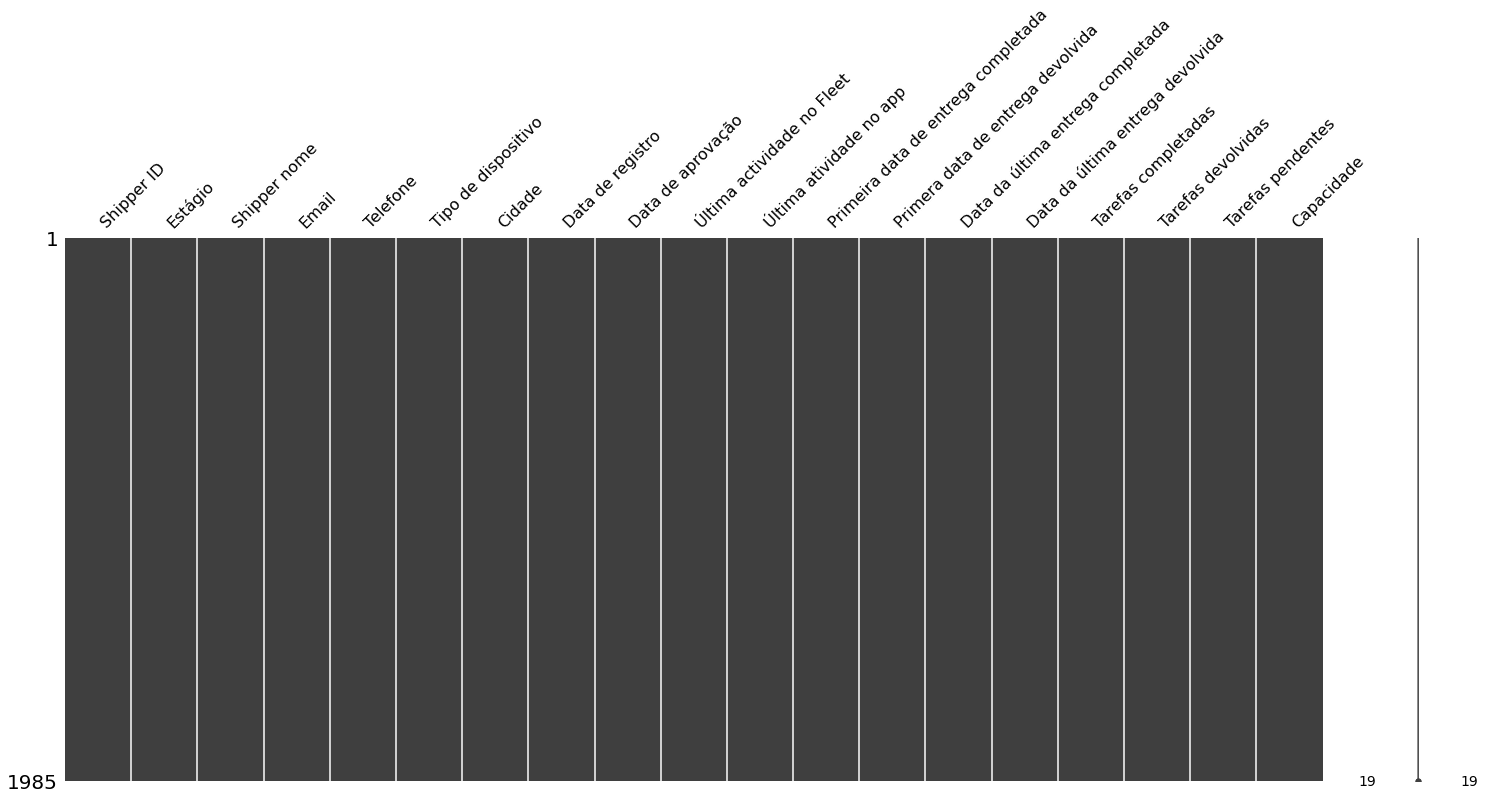

In [ ]:
msno.matrix(df_fleet);

In [ ]:
df_fleet.dtypes

Shipper ID                              int64
Estágio                                object
Shipper nome                           object
Email                                  object
Telefone                                int64
Tipo de dispositivo                    object
Cidade                                 object
Data de registro                       object
Data de aprovação                      object
Última actividade no Fleet             object
Última atividade no app                object
Primeira data de entrega completada    object
Primera data de entrega devolvida      object
Data da última entrega completada      object
Data da última entrega devolvida       object
Tarefas completadas                     int64
Tarefas devolvidas                      int64
Tarefas pendentes                       int64
Capacidade                             object
dtype: object

In [ ]:
df_fleet['Tipo de dispositivo'].value_counts("%")

android    0.830227
ios        0.169773
Name: Tipo de dispositivo, dtype: float64

In [ ]:
df_fleet['Capacidade'].value_counts("%")

Car      0.792443
Van      0.129471
Truck    0.039295
-        0.026700
Moto     0.012091
Name: Capacidade, dtype: float64

In [ ]:
from datetime import date, time, datetime

In [ ]:
df_fleet['Data de registro']= pd.to_datetime(df_fleet['Data de registro'])


In [ ]:
df_fleet.dtypes

Shipper ID                                      int64
Estágio                                        object
Shipper nome                                   object
Email                                          object
Telefone                                        int64
Tipo de dispositivo                            object
Cidade                                         object
Data de registro                       datetime64[ns]
Data de aprovação                              object
Última actividade no Fleet                     object
Última atividade no app                        object
Primeira data de entrega completada            object
Primera data de entrega devolvida              object
Data da última entrega completada              object
Data da última entrega devolvida               object
Tarefas completadas                             int64
Tarefas devolvidas                              int64
Tarefas pendentes                               int64
Capacidade                  

In [ ]:
df_fleet_nan = df_fleet.copy()

In [ ]:
df_fleet = df_fleet_nan.replace('-', np.nan)

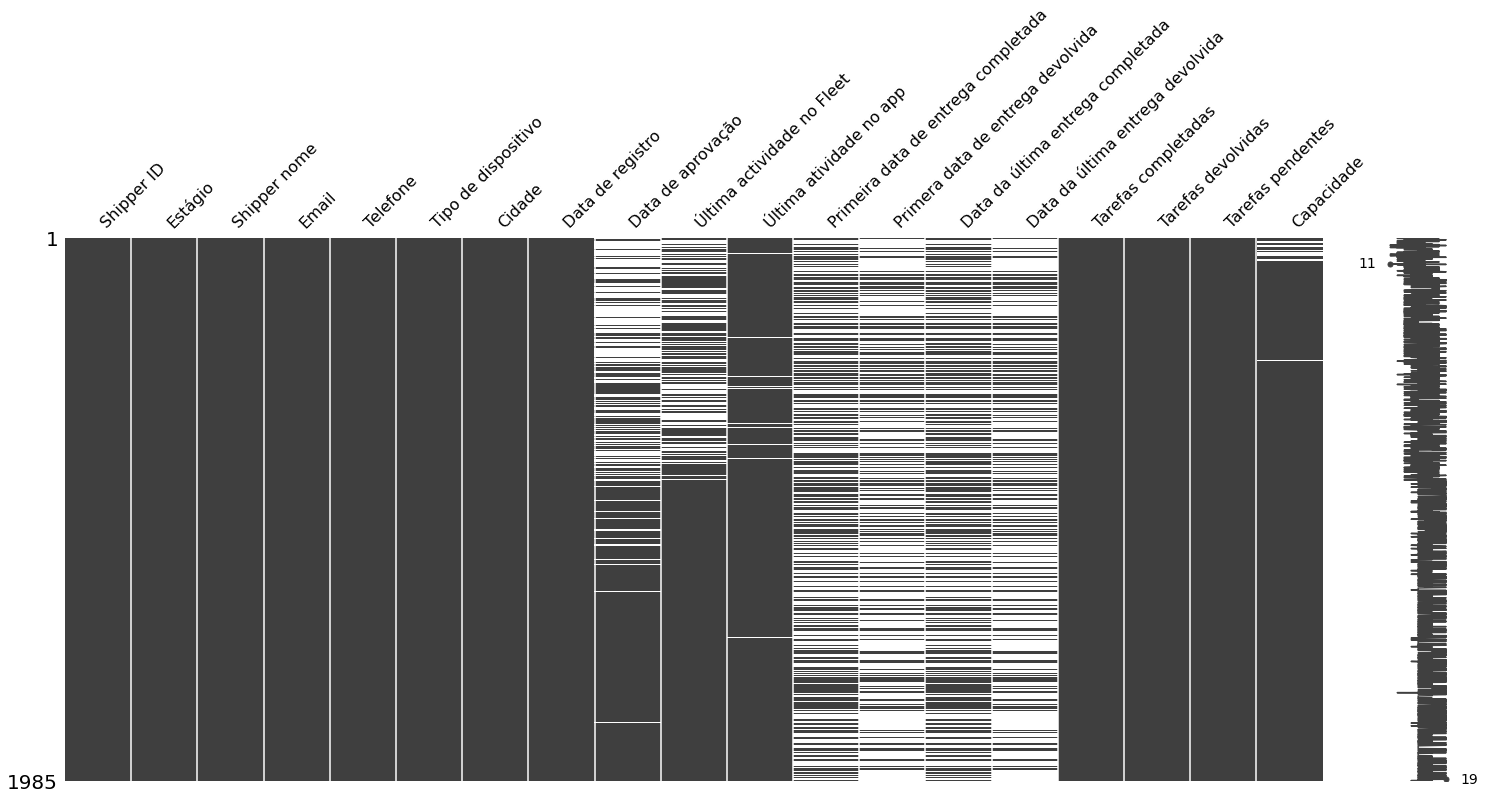

In [ ]:
msno.matrix(df_fleet);

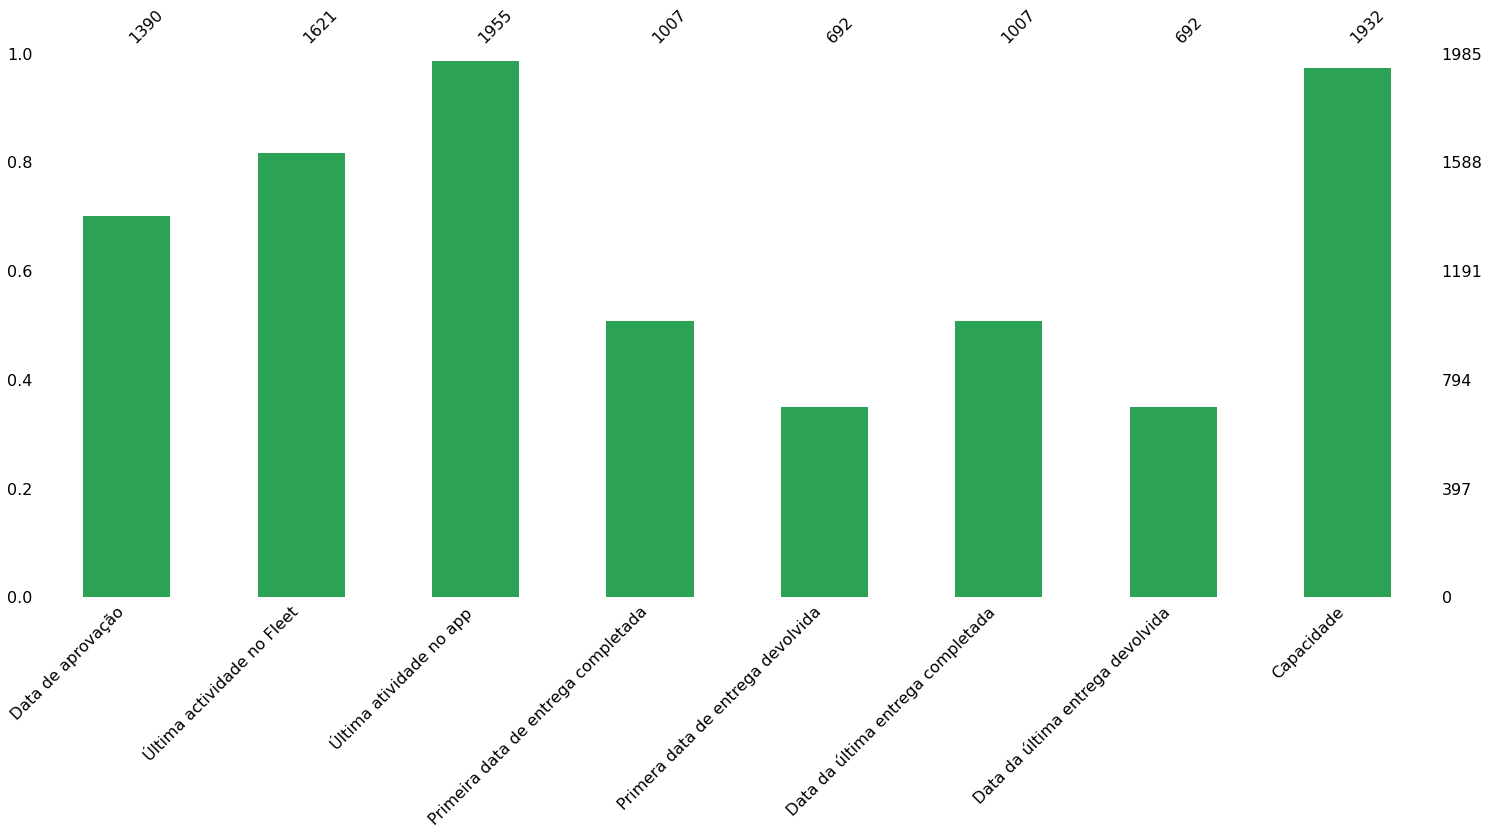

In [ ]:
df_perd = df_fleet.copy()

filtered_data = msno.nullity_filter(df_perd, filter='bottom', n=1000, p=0.999)

color = (0.171, 0.637, 0.328)

plt.figure()
msno.bar(filtered_data, color=color)

In [ ]:
df_fleet['Data de aprovação']= pd.to_datetime(df_fleet['Data de aprovação'])
df_fleet['Última actividade no Fleet']= pd.to_datetime(df_fleet['Última actividade no Fleet'])
df_fleet['Última atividade no app']= pd.to_datetime(df_fleet['Última atividade no app'])
df_fleet['Primera data de entrega devolvida']= pd.to_datetime(df_fleet['Primera data de entrega devolvida'])
df_fleet['Data da última entrega completada']= pd.to_datetime(df_fleet['Data da última entrega completada'])
df_fleet['Data da última entrega devolvida']= pd.to_datetime(df_fleet['Data da última entrega devolvida'])
df_fleet['Primeira data de entrega completada'] = pd.to_datetime(df_fleet['Primeira data de entrega completada'])

In [ ]:
df_fleet.dtypes

Shipper ID                                      int64
Estágio                                        object
Shipper nome                                   object
Email                                          object
Telefone                                        int64
Tipo de dispositivo                            object
Cidade                                         object
Data de registro                       datetime64[ns]
Data de aprovação                      datetime64[ns]
Última actividade no Fleet             datetime64[ns]
Última atividade no app                datetime64[ns]
Primeira data de entrega completada    datetime64[ns]
Primera data de entrega devolvida      datetime64[ns]
Data da última entrega completada      datetime64[ns]
Data da última entrega devolvida       datetime64[ns]
Tarefas completadas                             int64
Tarefas devolvidas                              int64
Tarefas pendentes                               int64
Capacidade                  

In [ ]:
df_fleet.sort_values(by="Data de registro")

Shipper ID    Estágio  ... Tarefas pendentes Capacidade
0           3330  ACTIVADOS  ...                 0        NaN
1           3430  ACTIVADOS  ...                 0        Car
2           3623  ACTIVADOS  ...                 0        NaN
3           4472  ACTIVADOS  ...                 0      Truck
4           6708  ACTIVADOS  ...                 0        Car
...          ...        ...  ...               ...        ...
1980      329044  ACTIVADOS  ...                 0        Car
1981      329231  ACTIVADOS  ...                 0        Van
1982      329698  ACTIVADOS  ...                 0        Van
1983      330553  ACTIVADOS  ...                 0        Car
1984      332192  ACTIVADOS  ...                 0        Van

[1985 rows x 19 columns]

In [ ]:
day_of_month_fleet = df_fleet['Data de registro'].dt.day

In [ ]:
day_of_month_fleet

0       11
1       16
2        4
3        2
4       30
        ..
1980    17
1981    17
1982    19
1983    23
1984    29
Name: Data de registro, Length: 1985, dtype: int64

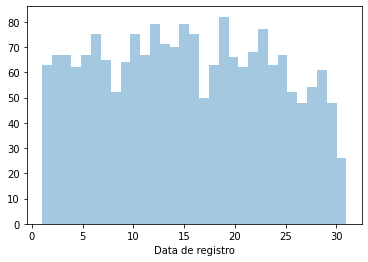

In [ ]:
# remove na's
day_of_month_fleet = day_of_month_fleet.dropna()

# plot the day of the month
sns.distplot(day_of_month_fleet, kde=False, bins=31)

In [ ]:
df_fleet_activity = df_fleet.loc[(df_fleet['Data de aprovação'] >= '2021-01-01 00:00:00')
                     & (df_fleet['Data de aprovação'] < '2021-08-30 23:00:00')]

In [ ]:
df_fleet_activity

Shipper ID    Estágio  ... Tarefas pendentes Capacidade
1           3430  ACTIVADOS  ...                 0        Car
7           7555  ACTIVADOS  ...                 0        Car
44         17596  ACTIVADOS  ...                 0        Car
45         17658  ACTIVADOS  ...                 0        Car
62         20554  ACTIVADOS  ...                 0        Car
...          ...        ...  ...               ...        ...
1977      327974  ACTIVADOS  ...                 0        Car
1978      328131  ACTIVADOS  ...                 0        Car
1980      329044  ACTIVADOS  ...                 0        Car
1982      329698  ACTIVADOS  ...                 0        Van
1983      330553  ACTIVADOS  ...                 0        Car

[981 rows x 19 columns]

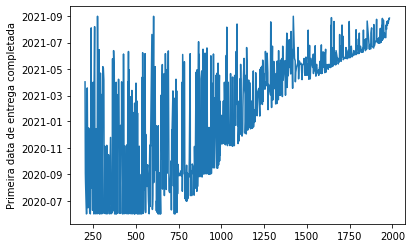

In [ ]:
drange = df_fleet.loc["2020-06-01 14:03:32":]
sns.lineplot(data = drange["Primeira data de entrega completada"])

In [ ]:
df_fleet["entrega_year"] = df_fleet["Primeira data de entrega completada"].dt.year
df_fleet["registro_year"] = df_fleet["Data de registro"].dt.year
df_fleet["aprobar_year"] = df_fleet["Data de aprovação"].dt.year

In [ ]:
df_fleet


Shipper ID    Estágio  ... registro_year aprobar_year
0           3330  ACTIVADOS  ...          2015          NaN
1           3430  ACTIVADOS  ...          2015       2021.0
2           3623  ACTIVADOS  ...          2016          NaN
3           4472  ACTIVADOS  ...          2016          NaN
4           6708  ACTIVADOS  ...          2016       2020.0
...          ...        ...  ...           ...          ...
1980      329044  ACTIVADOS  ...          2021       2021.0
1981      329231  ACTIVADOS  ...          2021          NaN
1982      329698  ACTIVADOS  ...          2021       2021.0
1983      330553  ACTIVADOS  ...          2021       2021.0
1984      332192  ACTIVADOS  ...          2021          NaN

[1985 rows x 22 columns]

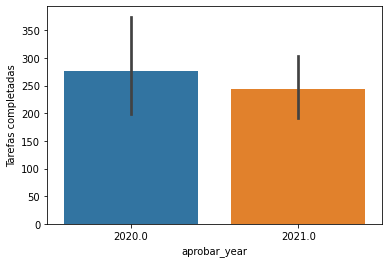

In [ ]:
sns.barplot(x = 'aprobar_year', y='Tarefas completadas', data = df_fleet)

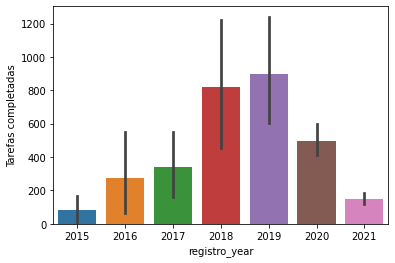

In [ ]:
sns.barplot(x = 'registro_year', y='Tarefas completadas', data = df_fleet)

In [ ]:
pd.crosstab(df_fleet.registro_year, df_fleet.aprobar_year)

aprobar_year   2020.0  2021.0
registro_year                
2015                0       1
2016                5       1
2017               11      10
2018               19      13
2019               23      22
2020              350     190
2021                0     745

In [ ]:
pd.crosstab(df_fleet.registro_year, df_fleet.entrega_year)

entrega_year   2020.0  2021.0
registro_year                
2015                0       1
2016                9       4
2017               27      10
2018               41      14
2019               68      24
2020              311     126
2021                0     372

In [ ]:
pd.crosstab(df_fleet.aprobar_year, df_fleet.entrega_year)

entrega_year  2020.0  2021.0
aprobar_year                
2020.0           154      62
2021.0            47     430

In [ ]:
display(Markdown("#### Tipo de deserción por periodo de registro (2014-2019)"))
shipper_tab = pd.crosstab(index=df_fleet['periodo'],
            columns=df_fleet[df_fleet["tipo_desercion"]!='Sin desercion']['tipo_desercion'].replace(np.nan,'sin información'), margins=True)
table5 = pd.DataFrame(table5)
table5['% Desercion informada: eliminacion'] =(table5['Desercion informada: eliminacion']/table5['All'])*100
table5['% Retiro definitivo o temporal S/N'] =(table5['Retiro definitivo o temporal S/N']/table5['All'])*100
table5['% Desercion no informada'] =(table5['Desercion no informada']/table5['All'])*100
table5['total']= table5['All']
table5